In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('melb_data.csv').dropna()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [4]:
def find_outliers(x):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    lower_whisker = np.percentile(x, 25) - (1.5 * iqr)
    upper_whisker = np.percentile(x, 75) + (1.5 * iqr)
    lower_outliers = []
    upper_outliers = []
    for i in x:
        if i < lower_whisker:
            lower_outliers.append(i)
        elif i > upper_whisker:
            upper_outliers.append(i)
    print('Q1 :', np.percentile(x, 25), '\n' 
    'Q2 :', np.percentile(x, 50), '\n'
    'Q3 :', np.percentile(x, 75), '\n'
    'IQR :', iqr, '\n'
    'Lower Outliers :', len(lower_outliers), '\n' 
    'Upper Outliers :', len(upper_outliers))

471.00693996126535

Q1 : 152.0 
Q2 : 373.0 
Q3 : 628.0 
IQR : 476.0 
Lower Outliers : 0 
Upper Outliers : 151


NormaltestResult(statistic=13309.56639382275, pvalue=0.0)

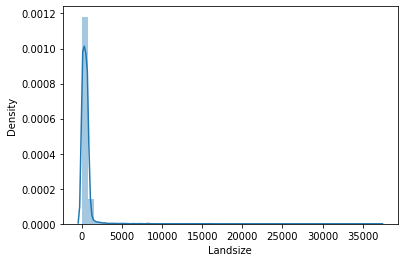

In [5]:
sns.distplot(df['Landsize'])
print(df['Landsize'].mean())
print('')
find_outliers(df['Landsize'])

stats.normaltest(df['Landsize'])

#df['Landsize'] memiliki central tendency di sekitar 471
#df['Landsize'] memiliki persebaran data / dispersion sebanyak 476 
#df['Landsize'] memiliki skew positif dan memiliki distribusi data yang tidak normal karena p value berada di bawah (0.05) dan memiliki upper outliers sebanyak 151


1068828.202065849

Q1 : 620000.0 
Q2 : 880000.0 
Q3 : 1325000.0 
IQR : 705000.0 
Lower Outliers : 0 
Upper Outliers : 288


NormaltestResult(statistic=3522.3809188140385, pvalue=0.0)

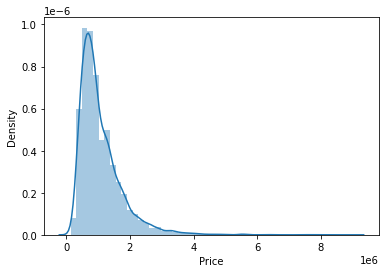

In [6]:
sns.distplot(df['Price'])
print(df['Price'].mean())
print('')

find_outliers(df['Price'])

stats.normaltest(df['Price'])

# df['Price'] memiliki central tendency di sekitar 1.068.828
#df['Price'] memiliki persebaran data / dispersion sebanyak 705.000
#df['Price'] memiliki skew positif dan memiliki distribusi data yang tidak normal karena p value berada di bawah (0.05) dan memiliki upper outliers sebanyak 288

Q1 : 5.9 
Q2 : 9.0 
Q3 : 12.4 
IQR : 6.5 
Lower Outliers : 0 
Upper Outliers : 204


<AxesSubplot:xlabel='Distance'>

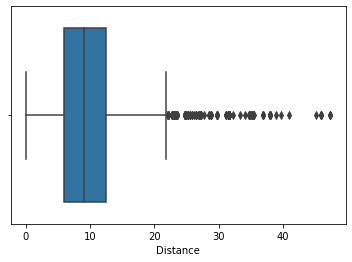

In [7]:
find_outliers(df['Distance'])

sns.boxplot(df['Distance'])
#df['Distance'] memiliki upper outliers sebanyak 204

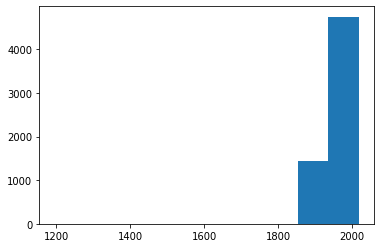

<Figure size 432x288 with 0 Axes>

In [123]:
plt.hist(df['YearBuilt'])
plt.show()

df['YearBuilt'].median()
plt.savefig('edahist.png')

# pembangunan rumah semakin meningkat sejak tahun 1970, dan terus bertambah tinggi menjelang tahun 2000 ke atas

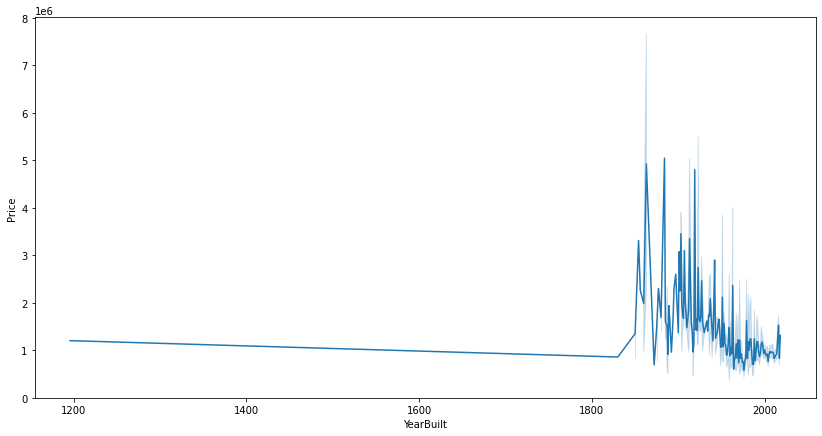

In [120]:
plt.figure(figsize= (14, 7))
sns.lineplot(x= 'YearBuilt', y= 'Price', data= df)
df['Price'].mean()
plt.savefig('edalineplot.png')

#harga rumah cenderung semakin meningkat seiring berjalannya tahun

In [28]:
df.corr(method= 'spearman')['Price']
# kolom Rooms memiliki korelasi tertinggi dengan kolom Price dibandingkan dengan kolom Landsize dan Distance
# korelasi dilakukan dengan metode spearman karena distribusi data tidak normal
# terdapat korelasi yang sedang / tidak terlalu kuat antara Price dan Rooms, sebaiknya dilakukan perubahan atau penyesuaian terhadap jumlah Rooms 

Rooms            0.591448
Price            1.000000
Distance        -0.117274
Postcode         0.227997
Bedroom2         0.574098
Bathroom         0.477049
Car              0.303794
Landsize         0.365473
BuildingArea     0.666623
YearBuilt       -0.365789
Lattitude       -0.255574
Longtitude       0.267049
Propertycount   -0.025932
Name: Price, dtype: float64

In [67]:
df[df['Price'] > df['Price'].mean()]['Regionname'].unique()

array(['Northern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan'], dtype=object)

In [63]:
print('RegionName yang rata-rata harga (Price) propertinya paling tinggi :')
print('Northern Metropolitan, Southern Metropolitan, Western Metropolitan, Eastern Metropolitan, South-Eastern Metropolitan')

RegionName yang rata-rata harga (Price) propertinya paling tinggi :
Northern Metropolitan, Southern Metropolitan, Western Metropolitan, Eastern Metropolitan, South-Eastern Metropolitan


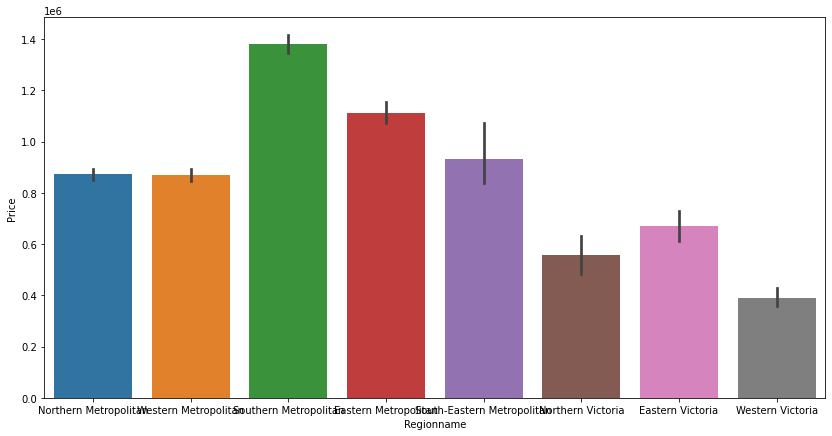

In [121]:
plt.figure(figsize= (14, 7))
sns.barplot(x= 'Regionname', y= 'Price', data= df)
plt.savefig('edabarplot.png')

#harga rata2 properti ada di sekitar 8.000.000

In [77]:
df.groupby('CouncilArea').mean().sort_values(['Price'], ascending= False).head()['Price']

CouncilArea
Boroondara     1.743578e+06
Bayside        1.701974e+06
Stonnington    1.390313e+06
Whitehorse     1.280521e+06
Manningham     1.236168e+06
Name: Price, dtype: float64

In [78]:
df.groupby('Type').mean().sort_values(['Price'], ascending= False).head()['Price']

Type
h    1.273016e+06
t    8.841816e+05
u    5.883745e+05
Name: Price, dtype: float64

In [92]:
df['Method'].mode()
#Method penjualan properti S paling sering dilakukan

0    S
dtype: object

Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name! (Anggap Price memiliki distribusi normal)

In [103]:
df.groupby(['Regionname'], as_index= False).mean()[['Regionname', 'Price']]

,Regionname,Price
0,Eastern Metropolitan,1.110341e+06
1,Eastern Victoria,6.699992e+05
2,Northern Metropolitan,8.722635e+05
3,Northern Victoria,5.568947e+05
4,South-Eastern Metropolitan,9.304847e+05
5,Southern Metropolitan,1.378654e+06
6,Western Metropolitan,8.675011e+05
7,Western Victoria,3.910714e+05


In [110]:
from scipy.stats import f_oneway
stats.f_oneway(df['Price'][df['Regionname'] == 'Eastern Metropolitan'],
               df['Price'][df['Regionname'] == 'Eastern Victoria'],
               df['Price'][df['Regionname'] == 'Northern Metropolitan'],
               df['Price'][df['Regionname'] == 'South-Eastern Metropolitan'],
               df['Price'][df['Regionname'] == 'Southern Metropolitan'],
               df['Price'][df['Regionname'] == 'Western Metropolitan'],
               df['Price'][df['Regionname'] == 'Western Victoria'])

F_onewayResult(statistic=145.8251553019363, pvalue=1.5641716840187926e-173)

In [114]:
df_baru = df[(df['Regionname']== 'Eastern Metropolitan') | (df['Regionname']== 'Eastern Victoria') | (df['Regionname']== 'Northern Metropolitan') | (df['Regionname']== 'South-Eastern Metropolitan') | (df['Regionname']== 'Southern Metropolitan') | (df['Regionname']== 'Southern Metropolitan') | (df['Regionname']== 'Western Metropolitan') | (df['Regionname']== 'Western Victoria')]
df_baru

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,Westmeadows,4 Pershore Ct,3,h,635000.0,S,Barry,29/07/2017,16.5,3049.0,...,2.0,1.0,691.0,177.00,1975.0,Hume,-37.68026,144.88468,Northern Metropolitan,2474.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


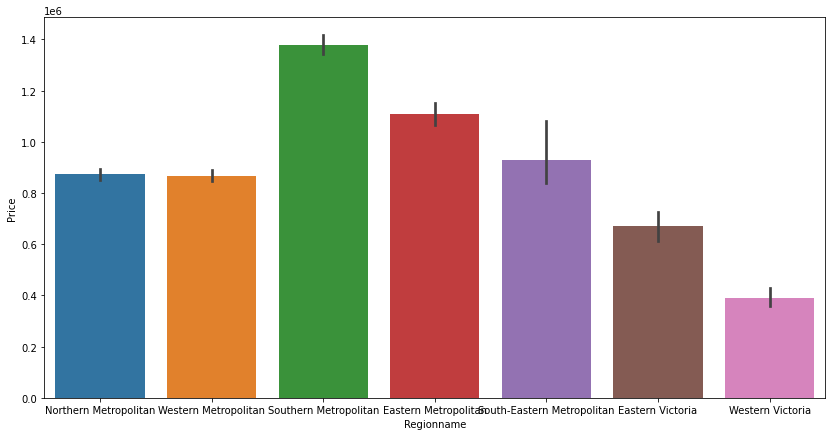

In [122]:
plt.figure(figsize= (14, 7))
sns.barplot(x= 'Regionname', y= 'Price', data= df_baru)
plt.savefig('edabarplot2.png')
# ada perbedaan harga properti antar Region Name, Southern Metropolitan merupakan yang tertinggi